# Scaling Exercises

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [64]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as wg

from env import get_connection

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import QuantileTransformer

## 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [2]:
zil = wg.wrangle_zillow(True)
zil.head()

,bedrooms,bathrooms,sq_ft,price,year_built,tax_amount,fips
4,4,2.0,3633.0,296425.0,2005,6941.39,Los Angeles County
6,3,4.0,1620.0,847770.0,2011,10244.94,Los Angeles County
7,3,2.0,2077.0,646760.0,1926,7924.68,Los Angeles County
11,0,0.0,1200.0,5328.0,1972,91.60,Los Angeles County
14,0,0.0,171.0,6920.0,1973,255.17,Los Angeles County


In [3]:
train, val, test = wg.train_val_test(zil)

train.shape, val.shape, test.shape

((1498164, 7), (321035, 7), (321036, 7))

In [28]:
def compare_data(scaled_col='none', df = train, original = 'price'):
    
    plt.figure(figsize=(13, 8))

    plt.subplot(121)
    sns.histplot(data=df, x=original, bins=10)

    plt.subplot(122)
    sns.histplot(data=df, x=scaled_col, bins=10)

    plt.show()

In [5]:
train.columns

Index(['bedrooms', 'bathrooms', 'sq_ft', 'price', 'year_built', 'tax_amount',
       'fips'],
      dtype='object')

In [9]:
scaled_cols = ['sq_ft', 'price', 'tax_amount']

mms = MinMaxScaler()
train_mms = train.copy()
mms.fit(train[scaled_cols])
train_mms[['sq_ft_mms', 'price_mms', 'tax_amount_mms']] = mms.transform(train[scaled_cols])

ss = StandardScaler()
train_ss = train.copy()
ss.fit(train[scaled_cols])
train_ss[['sq_ft_ss', 'price_ss', 'tax_amount_ss']] = ss.transform(train[scaled_cols])

rs = RobustScaler()
train_rs = train.copy()
rs.fit(train[scaled_cols])
train_rs[['sq_ft_rs', 'price_rs', 'tax_amount_rs']] = rs.transform(train[scaled_cols])

In [14]:
train_mms.head(3)

,bedrooms,bathrooms,sq_ft,price,year_built,tax_amount,fips,sq_ft_mms,price_mms,tax_amount_mms
1816338,4,3.0,2131.0,350540.0,1977,4719.83,Los Angeles County,0.002236,0.003887,0.004366
1770176,3,3.0,2084.0,425101.0,1953,6397.19,Los Angeles County,0.002187,0.004713,0.005921
1033606,4,3.0,2361.0,380546.0,2008,4815.34,Los Angeles County,0.002477,0.004219,0.004454


In [88]:
len(train_mms[train_mms.price < 2_000_000])/len(train_mms)

0.9818684736784491

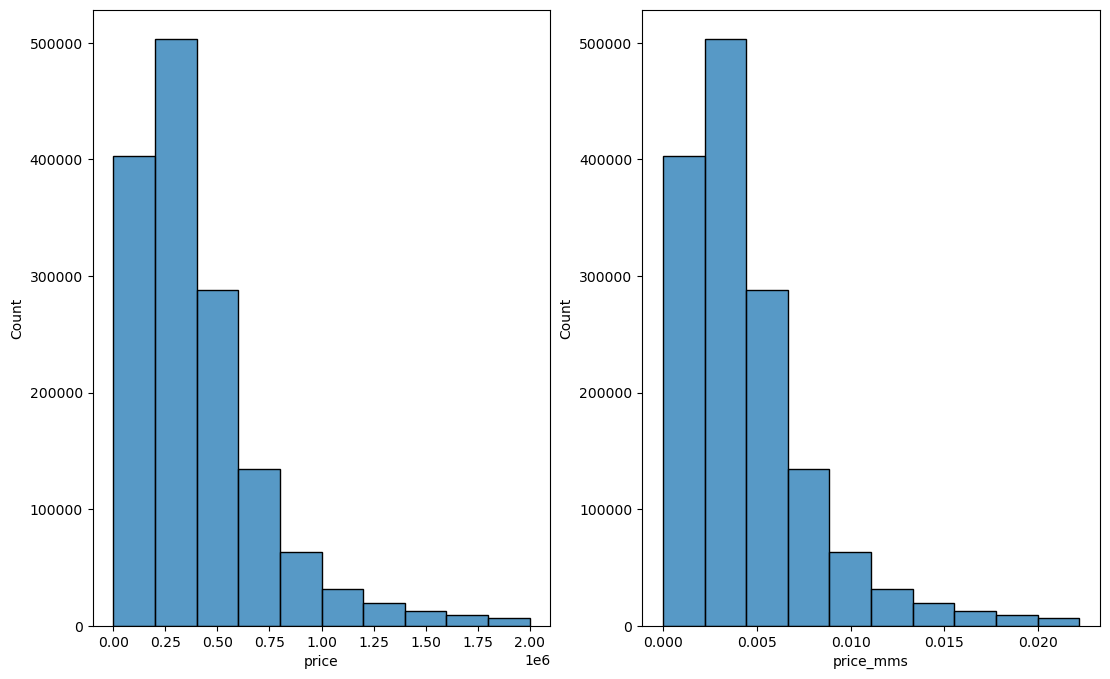

In [31]:
compare_data('price_mms', df = train_mms[train_mms.price < 2_000_000])

In [15]:
train_ss.head(3)

,bedrooms,bathrooms,sq_ft,price,year_built,tax_amount,fips,sq_ft_ss,price_ss,tax_amount_ss
1816338,4,3.0,2131.0,350540.0,1977,4719.83,Los Angeles County,0.203144,-0.162678,-0.114411
1770176,3,3.0,2084.0,425101.0,1953,6397.19,Los Angeles County,0.167455,-0.051948,0.101098
1033606,4,3.0,2361.0,380546.0,2008,4815.34,Los Angeles County,0.377795,-0.118116,-0.102140


In [39]:
len(train_mms[train_mms.sq_ft < 5_000])/len(train_mms)

0.9873712090265151

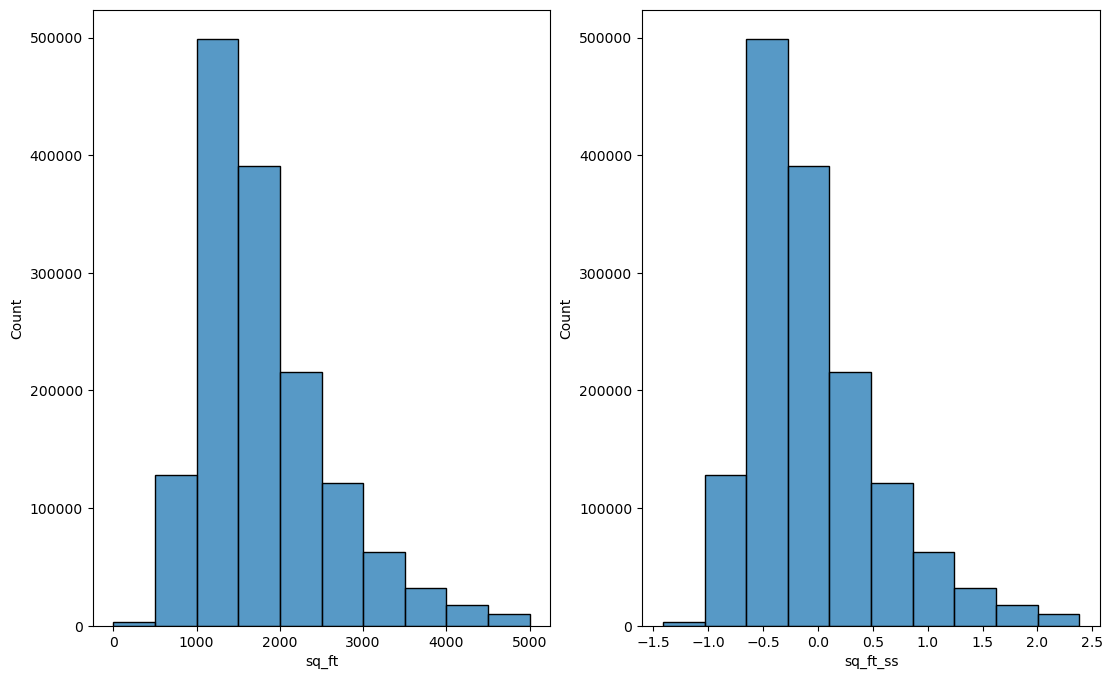

In [40]:
compare_data('sq_ft_ss', original ='sq_ft', df = train_ss[train_ss.sq_ft < 5_000])

In [16]:
train_rs.head(3)

,bedrooms,bathrooms,sq_ft,price,year_built,tax_amount,fips,sq_ft_rs,price_rs,tax_amount_rs
1816338,4,3.0,2131.0,350540.0,1977,4719.83,Los Angeles County,0.533684,0.063658,0.156881
1770176,3,3.0,2084.0,425101.0,1953,6397.19,Los Angeles County,0.484211,0.279481,0.590101
1033606,4,3.0,2361.0,380546.0,2008,4815.34,Los Angeles County,0.775789,0.150513,0.181549


In [46]:
len(train_mms[train_mms.tax_amount < 25_000])/len(train_mms)

0.9842747522968113

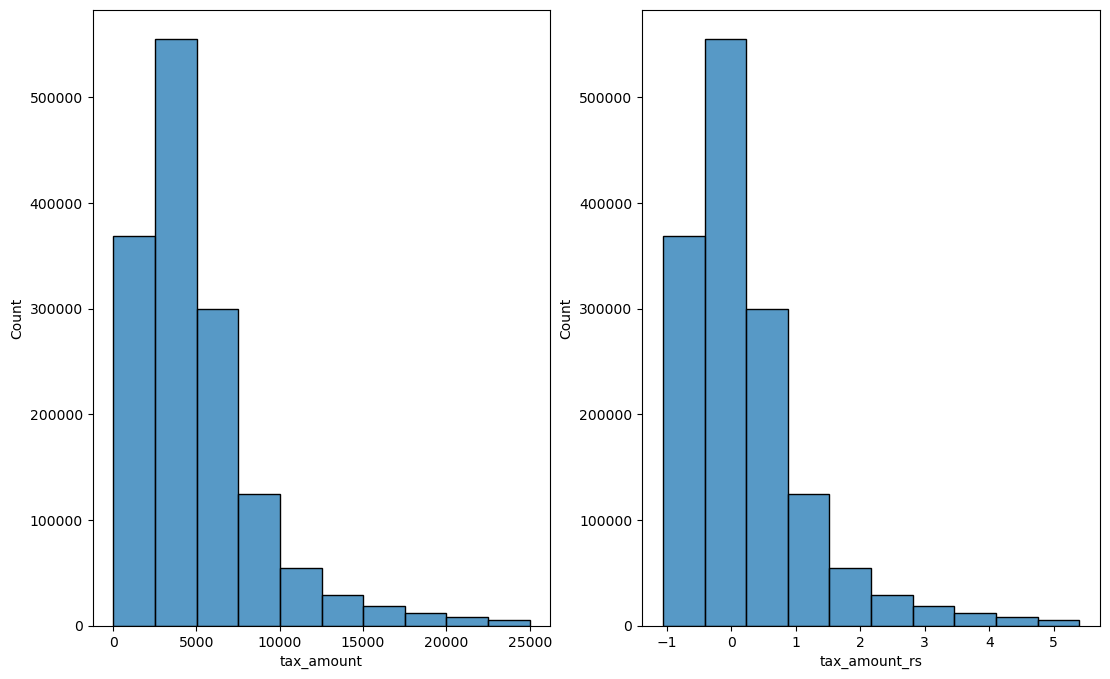

In [45]:
compare_data('tax_amount_rs', original ='tax_amount', df = train_rs[train_ss.tax_amount < 25_000])

## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [61]:
og_data = mms.inverse_transform(train_mms[['sq_ft_mms', 'price_mms', 'tax_amount_mms']])
pd.DataFrame(og_data).head()

,0,1,2
0,2131.0,350540.0,4719.83
1,2084.0,425101.0,6397.19
2,2361.0,380546.0,4815.34
3,2289.0,293831.0,3559.74
4,2901.0,470040.0,5509.28


In [62]:
train.head()

,bedrooms,bathrooms,sq_ft,price,year_built,tax_amount,fips
1816338,4,3.0,2131.0,350540.0,1977,4719.83,Los Angeles County
1770176,3,3.0,2084.0,425101.0,1953,6397.19,Los Angeles County
1033606,4,3.0,2361.0,380546.0,2008,4815.34,Los Angeles County
2093580,5,3.0,2289.0,293831.0,1969,3559.74,Los Angeles County
1677414,5,3.0,2901.0,470040.0,1994,5509.28,Orange County


## 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

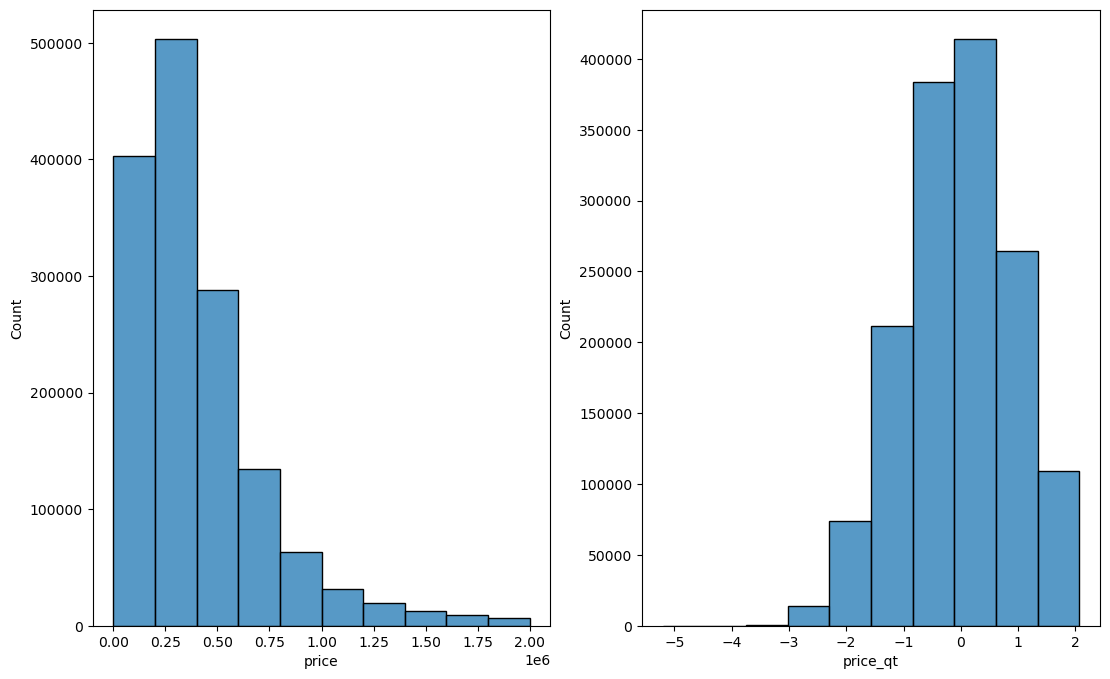

In [83]:
qt = QuantileTransformer(n_quantiles=100, output_distribution='normal')
train_qt = train.copy()
train_qt[['sq_ft_qt', 'price_qt', 'tax_amount_qt']] = qt.fit_transform(train[scaled_cols])
compare_data('price_qt', df = train_qt[train_qt.price < 2_000_000])

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

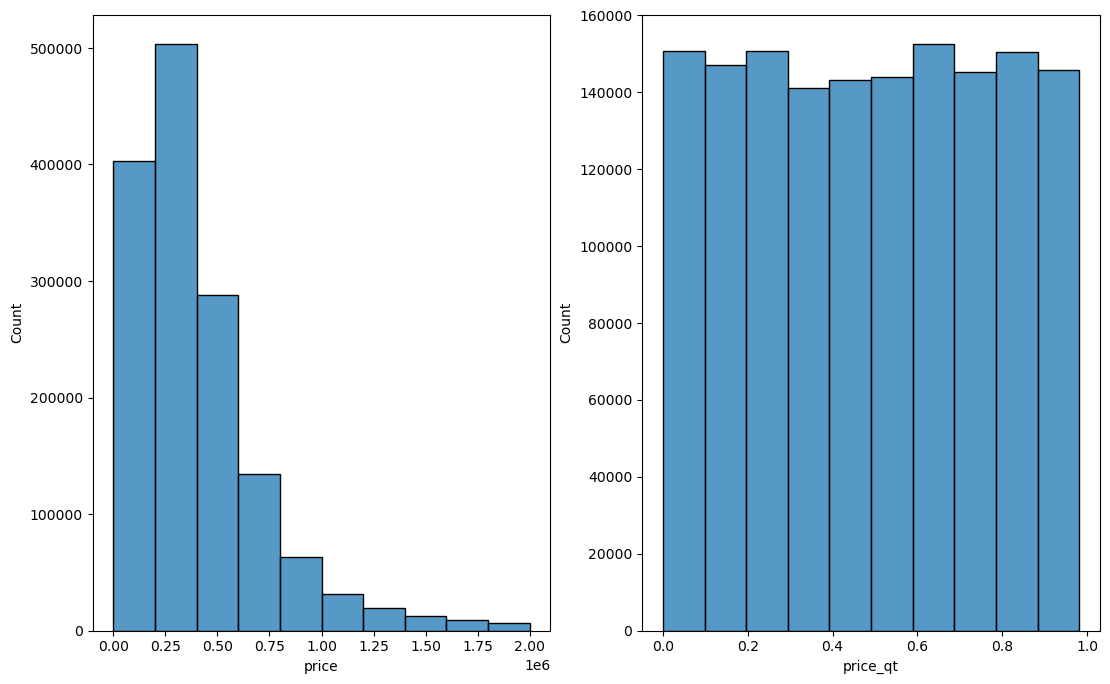

In [85]:
qt = QuantileTransformer(n_quantiles=100)
train_qt = train.copy()
train_qt[['sq_ft_qt', 'price_qt', 'tax_amount_qt']] = qt.fit_transform(train[scaled_cols])
compare_data('price_qt', df = train_qt[train_qt.price < 2_000_000])

## 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!